<a href="https://colab.research.google.com/github/yunus-cpu/Yolov11_BrainTumorDetection/blob/main/YOLOV11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Drive'a bağlanma
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#ORTAM HAZIRLĞI

In [ ]:
%pwd


'/content'

In [ ]:
%cd /content/drive/MyDrive/YOLOV8/7_Yolov11_tumor


/content/drive/MyDrive/YOLOV8/7_Yolov11_tumor


In [ ]:
#Ultralyticsi indir
%pip install ultralytics

import ultralytics

ultralytics.checks()

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [ ]:
!yolo classify train \
  model=yolo11l-cls.pt \
  data=/content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/data/BrainTumor_classification \
  imgsz=224 \
  workers=4 \
  batch=16 \
  device=0 \
  epochs=25 \
  lr0=0.001 \
  weight_decay=0.0005 \
  name="yolov11_classification_reg"


Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/data/BrainTumor_classification, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11_classification_reg, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask

In [ ]:
# 1. YÖNTEM Resim sınıflandırma
!yolo classify predict model=/content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/runs/classify/yolov11_classification/weights/best.pt source=/content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/inference11 save=True

Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-cls summary (fused): 94 layers, 12,823,556 parameters, 0 gradients, 49.3 GFLOPs

100% 755k/755k [00:00<00:00, 151MB/s]
image 1/31 /content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/inference11/Te-gl_0010.jpg: 224x224 glioma 1.00, pituitary 0.00, meningioma 0.00, notumor 0.00, 9.3ms
image 2/31 /content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/inference11/Te-gl_0016.jpg: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 9.4ms
image 3/31 /content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/inference11/Te-gl_0020.jpg: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 8.7ms
image 4/31 /content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/inference11/Te-gl_0022.jpg: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 16.6ms
image 5/31 /content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/inference11/Te-me_0014.jpg: 224x224 meningioma 1.00, pituitary 0.00, glioma 0.00, notumor 0.00, 


0: 224x224 meningioma 1.00, glioma 0.00, pituitary 0.00, notumor 0.00, 14.8ms
Speed: 11.7ms preprocess, 14.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


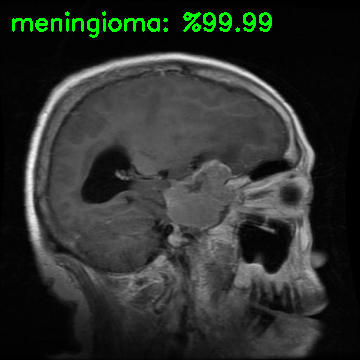

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import imutils

# Model ve görsel yolu
img_path = "/content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/inference11/Te-me_0266.jpg"
model_path = "/content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/runs/classify/yolov11_classification/weights/best.pt"

# Modeli yükle
model = YOLO(model_path)

# Görseli yükle ve boyutlandır
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

# Modeli çalıştır ve sonuçları al
results = model(img)[0]

# Sonuçları al
probs = results.probs.data.tolist()  # Sınıf olasılıklarını al
class_names = results.names  # Sınıf isimleri

# En yüksek olasılığa sahip sınıfı bul
max_prob_index = probs.index(max(probs))
predicted_class = class_names[max_prob_index]
confidence = probs[max_prob_index] * 100  # Yüzdelik hale getir

# Sonucu ekrana yazdır
text = f"{predicted_class}: %{confidence:.2f}"
cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Görseli göster
cv2_imshow(img)


In [ ]:
from ultralytics import YOLO
import numpy as np
from sklearn.metrics import classification_report
import os
from glob import glob

# Eğitilmiş YOLOv11 sınıflandırma modelini yükle
model = YOLO("/content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/runs/classify/yolov11_classification/weights/best.pt")

# Sınıf isimleri (klasör adları aynı olmalı)
class_names = ["glioma", "meningioma", "notumor", "pituitary"]
base_path = "/content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/data/BrainTumor_classification/test"

test_images = []
true_labels = []

# Her sınıf klasöründen tek tek tüm resimleri al
for label, class_name in enumerate(class_names):
    folder_path = os.path.join(base_path, class_name)
    image_paths = glob(os.path.join(folder_path, "*.jpg"))  # Eğer .png ise değiştir
    test_images.extend(image_paths)
    true_labels.extend([label] * len(image_paths))

# Tahmin yap
results = model(test_images)

# Tahmin edilen sınıflar
pred_labels = [res.probs.top1 for res in results]

# Sınıf isimlerine göre classification report
print(classification_report(true_labels, pred_labels, target_names=class_names))



0: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 195.7ms
1: 224x224 glioma 0.99, meningioma 0.01, pituitary 0.00, notumor 0.00, 195.7ms
2: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 195.7ms
3: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 195.7ms
4: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 195.7ms
5: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 195.7ms
6: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 195.7ms
7: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 195.7ms
8: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 195.7ms
9: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 195.7ms
10: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 195.7ms
11: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 195.7ms
12: 224x224 glioma 1.00, pituitary 0.00, meningio

In [ ]:
# Sınıflandırma raporunu yazdır
print("Classification Report:")
print(classification_report(true_labels, pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       163
           1       0.98      0.98      0.98       165
           2       0.99      1.00      1.00       200
           3       0.99      0.99      0.99       177

    accuracy                           0.99       705
   macro avg       0.99      0.99      0.99       705
weighted avg       0.99      0.99      0.99       705



In [ ]:
from ultralytics import YOLO
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import os
from glob import glob

# Sınıf isimleri ve yol
class_names = ["glioma", "meningioma", "notumor", "pituitary"]
base_path = "/content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/data/BrainTumor_classification/test"

# Modeli yükle
model = YOLO("//content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/runs/classify/yolov11_classification/weights/best.pt")

test_images = []
true_labels = []

# Görüntüleri ve etiketleri topla
for label, class_name in enumerate(class_names):
    folder_path = os.path.join(base_path, class_name)
    image_paths = glob(os.path.join(folder_path, "*.jpg"))
    test_images.extend(image_paths)
    true_labels.extend([label] * len(image_paths))

# Model tahminleri
results = model(test_images)

# Gerçek etiketleri one-hot vektörle (ROC için gerekli)
y_true = label_binarize(true_labels, classes=[0, 1, 2, 3])

# Tahmin olasılıklarını al (4 sınıf için 4 olasılık)
y_score = np.array([res.probs.data.tolist() for res in results])

# ROC Curve ve AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(class_names)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrilerini çiz
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - YOLOv8 Brain Tumor Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


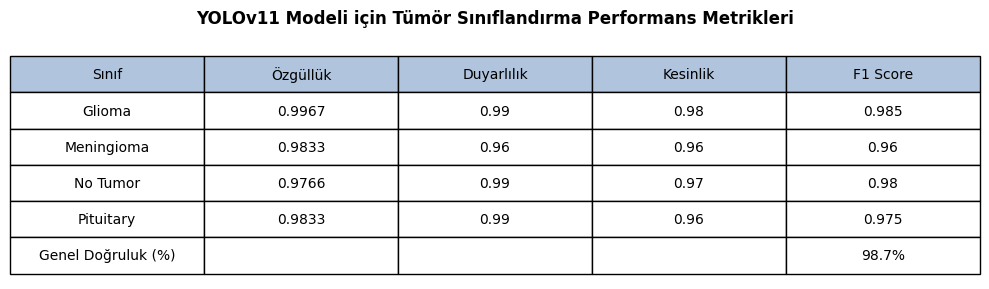

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Veri tablosu
data = {
    "Sınıf": ["Glioma", "Meningioma", "No Tumor", "Pituitary", "Genel Doğruluk (%)"],
    "Özgüllük": [0.9967, 0.9833, 0.9766, 0.9833, ""],
    "Duyarlılık": [0.99, 0.96, 0.99, 0.99, ""],
    "Kesinlik": [0.98, 0.96, 0.97, 0.96, ""],
    "F1 Score": [0.985, 0.96, 0.98, 0.975, ""],
}

df = pd.DataFrame(data)
df.loc[4, "F1 Score"] = "98.7%"

# Görsel oluşturma
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')

table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center',
    colColours=["#B0C4DE"] * len(df.columns)
)

# Stil ayarları
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.2)  # hücre yüksekliği

# Başlık
plt.title("YOLOv11 Modeli için Tümör Sınıflandırma Performans Metrikleri", fontsize=12, weight='bold', pad=20)

plt.tight_layout()
plt.show()
